# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$
   \nabla Q(w) = 2X^T (Xw - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/72779485/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/72779554/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/72779695/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/72779731/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/72779766/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
# смотрю информацию
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [10]:
# смотрю пропуски
data.isna().sum()

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

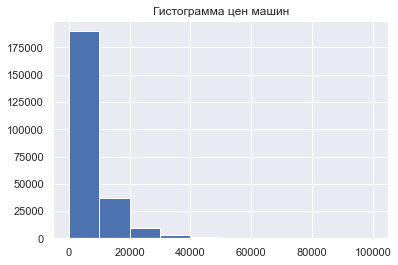

In [11]:
# строю гистограмму распределения
plt.hist(data['price'])
plt.title('Гистограмма цен машин')
plt.show()

Ситуация похожа на домашку номер 2, думаю, стоит заменить цену на логарифм цены

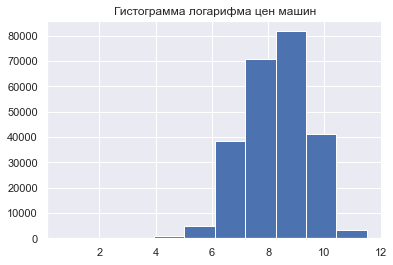

In [12]:
# добавляю логарифм цены и смотрю распределение
data['price_log'] = data['price'].apply(np.log1p)
plt.hist(data['price_log'])
plt.title('Гистограмма логарифма цен машин')
plt.show()

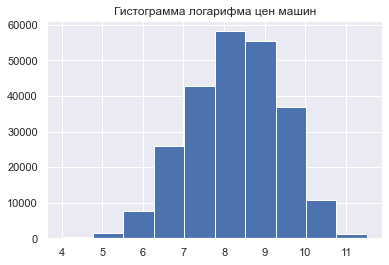

In [13]:
# удалю слишком маленькие значения price_log (< 4), тобишь крайне дешевые машины
data = data[data['price_log'] > 4]
plt.hist(data['price_log'])
plt.title('Гистограмма логарифма цен машин')
plt.show()

In [14]:
# трансформирую бинарный признак
data['notRepairedDamage'] = 1 * (data['notRepairedDamage'] == 'ja')

In [15]:
# предполагаю, что машина с автоматической коробкой стоит в среднем дороже
data.groupby(data['gearbox']).mean()

,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,price_log
gearbox,,,,,,
automatik,0.079125,181.954629,120850.462577,130.785476,11564.930266,8.886488
manuell,0.102932,115.394103,124660.793672,149.043524,5434.181094,8.084923


In [16]:
# так и вышло, трансформирую
data['gearbox'] = 1 * (data['gearbox'] == 'automatik')

In [17]:
data.groupby('autoAgeMonths')['price'].mean()

autoAgeMonths
1      27353.619883
2      29004.682540
3      25620.800000
4      29452.265060
5      30120.514925
           ...     
596    17487.500000
597    27495.409091
598    23473.333333
599    69999.000000
600    10857.000000
Name: price, Length: 594, dtype: float64

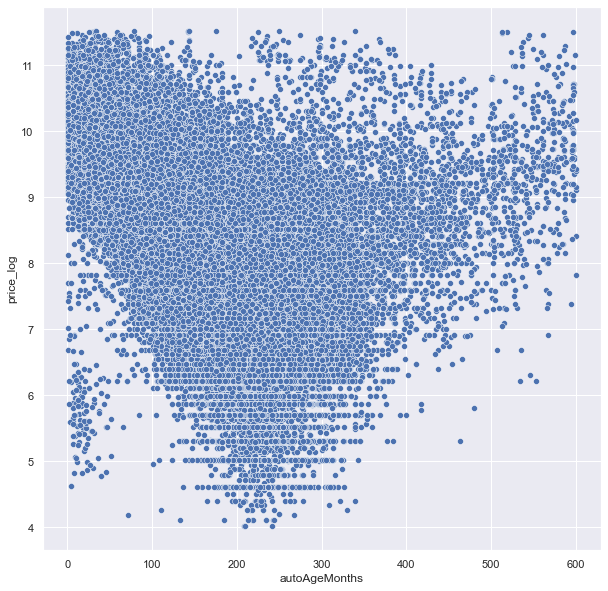

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='autoAgeMonths', y='price_log')
plt.show()

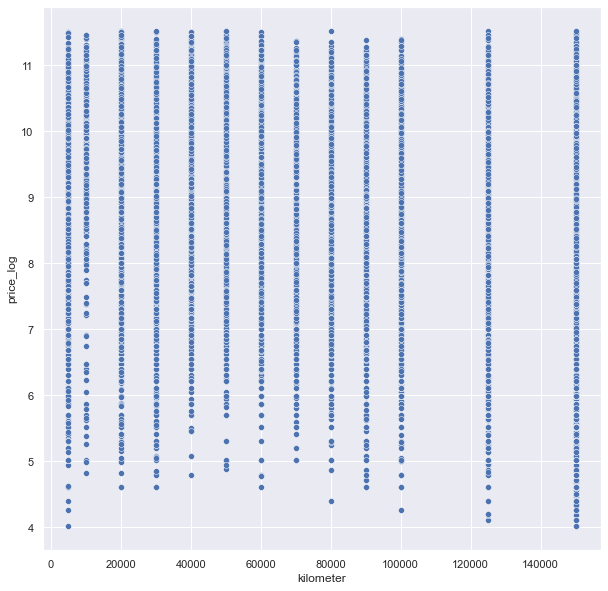

In [19]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='kilometer', y='price_log')
plt.show()

Судя по графику выше, kilometer стоит считать категориальным признаком

In [20]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

# YOUR CODE (EDA):

In [21]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price_log']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [23]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=111)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=111)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [24]:
"""
при stochastic descent код падает, у x и y после разбиения почему-то разные индексы
и y[batch] не может взяться правильно, не стал разбираться почему и 
в тупую пофиксил кастом pandas.dataframe у игрика к numpy.ndarray
"""
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [25]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [26]:
type(y_train)

numpy.ndarray

In [27]:
# YOUR CODE:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import math 

lambdas = np.logspace(-4, 1, 10)
methods = ['full', 'stochastic', 'momentum', 'adam']

In [28]:
"""
Для каждого из спусков пробегаюсь по лямбдам, запускаю fit линейной регрессии и нахожу лямбду,
при которой calc_loss выдает наименьшее значение, сохраняю всю информацию в dictionary
"""

descents_info = {
    'full': {},
    'stochastic': {},
    'momentum': {},
    'adam': {}
}

for method in methods:
    best_lambda = None
    best_loss = math.inf
    
    descent_name_ = method
    dimension_ = X_valid.shape[1]
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_
        }
    }
        
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        
        model = LinearRegression(descent_config = descent_config)
        model = model.fit(X_train, y_train)
    
        mse_valid = model.calc_loss(X_valid, y_valid)
        
        if mse_valid < best_loss:
            best_lambda = lambda_
            best_loss = mse_valid
            
    descents_info[method]['lambda'] = best_lambda
    descents_info[method]['loss'] = best_loss

In [29]:
"""
Для каждого спуска запускаю линейную регрессию при лучшей лямбде и считываю всевозможные характеристики
в словарь descents_info
"""

for method in methods:
    r2_train = math.inf
    r2_test = math.inf
    
    mse_train = math.inf
    mse_test = math.inf
    
    iterations_num = None
    
    descent_name_ = method
    dimension_ = X_train.shape[1]
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : descents_info[method]['lambda']
        }
    }
        
    model = LinearRegression(descent_config = descent_config)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = model.calc_loss(X_train, y_train)
    mse_test = model.calc_loss(X_test, y_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    iterations = model.loss_history
    iterations_num = len(model.loss_history)
    
    new_info = {
        'lambda': descents_info[method]['lambda'],
        'loss': descents_info[method]['loss'],
        'r2_train': r2_train,
        'r2_test': r2_test,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'iterations': iterations,
        'iterations_num': iterations_num
    }
    descents_info[method] = new_info

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

`### ваше решение тут ###`

In [ ]:
descents_df = pd.DataFrame(data=descents_info)
descents_df = (descents_df.T).drop('iterations', axis=1)
descents_df 

In [ ]:
plt.figure(figsize=(16, 8))

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации для MSE')
plt.yscale('log') 

for method in methods:
    plt.plot(descents_info[method]['iterations'], label=method)
    
plt.legend()
plt.show()

Из графиков видно, что adam и stochastic сходятся наиболее быстро и плавно. У full происходит какой-то неадекватный скачок MSE вверх, надеюсь получится пофиксить регуляризацией и штрафами. Momentum очень сильно бросает вверх вниз, но к хорошему MSE в конце концов все равно получается прийти

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
method = 'stochastic'

k = 10

mean_iterations = []
mean_times = []

descent_name_ = method
dimension_ = X_train.shape[1]
lambda_ = descents_info[method]['lambda']
descent_config = {
            'descent_name': descent_name_,
            'kwargs': {
                'dimension': dimension_,
                'lambda_' : lambda_
            }
        }

for batch_size in batch_sizes:
    iteration_mean = 0
    time_mean = 0
    for _ in range(k):
        descent_config['kwargs']['batch_size'] = batch_size
    
        model = LinearRegression(descent_config = descent_config)
        start = time.time()
        model = model.fit(X_train, y_train)
        stop = time.time()
        
        iteration_mean += len(model.loss_history)
        time_mean += (stop - start)
    
    mean_iterations.append(iteration_mean / k)
    mean_times.append(time_mean / k)

`### ваше решение тут ###`

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Зависимость времени работы от размера batch')
plt.xlabel('batch size')
plt.ylabel('time')
plt.plot(batch_sizes, mean_times)
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Зависимость количества итераций от размера batch')
plt.xlabel('batch size')
plt.ylabel('number of iterations')
plt.plot(batch_sizes, mean_iterations)
plt.show()

**Вывод**: чем больше размер batch, тем меньшее количество итераций происходит и соответственно меньшее количество времени затрачивается. Следовательно, нужно брать достаточно большой размер batch, чтобы получить оптимальные скорость и качество работы, при этом не слишком большой, чтобы не приблизится к full descent

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/72924047/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE: 
mus = np.logspace(-4, 0, 5)

methods = ['full', 'stochastic', 'momentum', 'adam']
descents_info_reg = {
    'full': {},
    'stochastic': {},
    'momentum': {},
    'adam': {}
}

for method in methods:
    best_lambda = None
    best_mu = math.inf
    best_loss = math.inf
    
    descent_name_ = method
    dimension_ = X_valid.shape[1]
    descent_config = {
        'descent_name': descent_name_,
        'regularized': True,
        'kwargs': {
            'dimension': dimension_
        }
    }
    
    for lambda_ in lambdas:
        for mu_ in mus:
            descent_config['kwargs']['lambda_'] = lambda_
            descent_config['kwargs']['mu'] = mu_
            
            model = LinearRegression(descent_config = descent_config)
            
            model = model.fit(X_train, y_train)

            mse_valid = model.calc_loss(X_valid, y_valid)
            
            if mse_valid < best_loss:
                best_lambda = lambda_
                best_mu = mu_
                best_loss = mse_valid

    descents_info_reg[method]['lambda'] = best_lambda
    descents_info_reg[method]['loss'] = best_loss
    descents_info_reg[method]['mu'] = best_mu

`### ваше решение тут ###`

In [ ]:
for method in methods:
    r2_train = math.inf
    r2_test = math.inf
    
    mse_train = math.inf
    mse_test = math.inf
    
    iterations_num = None
    
    descent_name_ = method
    dimension_ = X_train.shape[1]
    descent_config = {
        'descent_name': descent_name_,
        'regularized': True,
        'kwargs': {
            'dimension': dimension_,
            'lambda_' : descents_info_reg[method]['lambda'],
            'mu': descents_info_reg[method]['mu']
        }
    }
        
    model = LinearRegression(descent_config = descent_config)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = model.calc_loss(X_train, y_train)
    mse_test = model.calc_loss(X_test, y_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    iterations = model.loss_history
    iterations_num = len(model.loss_history)
    
    new_info = {
        'lambda': descents_info[method]['lambda'],
        'loss': descents_info[method]['loss'],
        'mu': descents_info_reg[method]['mu'],
        'r2_train': r2_train,
        'r2_test': r2_test,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'iterations': iterations,
        'iterations_num': iterations_num
    }
    descents_info_reg[method] = new_info

In [ ]:
for method in methods:
    plt.figure(figsize=(10, 5))
    plt.yscale('log')
    
    plt.xlabel('iterations')
    plt.ylabel('mse')
    
    plt.title(method + ' with and without regularization', size=15)
    plt.plot(descents_info[method]['iterations'], label='without regularization')
    plt.plot(descents_info_reg[method]['iterations'], label='with regularization')
    
    plt.legend(facecolor='white', fontsize=12)
    plt.show()

In [ ]:
descents_df

In [ ]:
descents_df_reg = pd.DataFrame(data=descents_info_reg)
descents_df_reg = (descents_df_reg.T).drop('iterations', axis=1)
descents_df_reg 

**Вывод**: регуляризация спасает от резких выбросов (особенно хорошо заметно на full и momentum), все работает как и ожидалось. MSE как будто бы не очень сильно изменилась 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`
$$
a = xw \rightarrow 
L(y, a) = L(y, x, w) = \log \left( \cosh (Xw - y) \right)
$$

Считаем:

$$
\frac{\partial \log \left( \cosh (Xw - y) \right)}{\partial w} = 
\frac{1}{\cosh (Xw - y)} \cdot \frac{\partial \cosh (Xw - y)}{\partial w}
=
\frac{1}{\cosh (Xw - y)} \cdot \frac{\sinh (Xw - y)}{1} \cdot \frac{\partial(Xw - y)}{\partial w}
=
\frac{\sinh (Xw - y)}{\cosh (Xw - y)} \cdot \frac{\partial(Xw - y)}{\partial w}
=
\tanh (Xw - y) \cdot X \frac{\partial}{\partial w}
$$

Т.к для подсчета градиента мы хотим посчитать сумму, то сумма будет равна:
$$
X^T \cdot \tanh (Xw - y) 
$$
А еще стоит не забыть про вид функции $Q(w)$:

$$
Q(w) = \frac{1}{l} \cdot \log (\cosh (Xw - y))
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [30]:
from descents import LossFunction

# YOUR CODE:
methods = ['full', 'stochastic', 'momentum', 'adam']

descents_info_log_cosh = {
    'full': {},
    'stochastic': {},
    'momentum': {},
    'adam': {}
}

for method in methods:
    best_lambda = None
    best_loss = math.inf
    
    descent_name_ = method
    dimension_ = X_valid.shape[1]
    loss_function_ = LossFunction.LogCosh
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_
        }
    }
        
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        model = LinearRegression(descent_config = descent_config)
        model = model.fit(X_train, y_train)
    
        logcosh_valid = model.calc_loss(X_valid, y_valid)
        
        if logcosh_valid < best_loss:
            best_lambda = lambda_
            best_loss = logcosh_valid
            
    descents_info_log_cosh[method]['lambda'] = best_lambda
    descents_info_log_cosh[method]['loss'] = best_loss
descents_info_log_cosh

{'full': {'lambda': 10.0, 'loss': 0.12360611829063639},
 'stochastic': {'lambda': 10.0, 'loss': 0.12092265386122232},
 'momentum': {'lambda': 10.0, 'loss': 0.10628967630685564},
 'adam': {'lambda': 10.0, 'loss': 0.10416021596820094}}

In [31]:
for method in methods:
    r2_train = math.inf
    r2_test = math.inf
    
    mse_train = math.inf
    mse_test = math.inf
    
    iterations_num = None
    
    descent_name_ = method
    dimension_ = X_train.shape[1]
    loss_function_ = LossFunction.LogCosh
    descent_config = {
        'descent_name': descent_name_,
        'regularized': False,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_,
            'lambda_' : descents_info_log_cosh[method]['lambda']
        }
    }
        
    model = LinearRegression(descent_config = descent_config)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    logcosh_train = model.calc_loss(X_train, y_train)
    logcosh_test = model.calc_loss(X_test, y_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    iterations = model.loss_history
    iterations_num = len(model.loss_history)
    
    new_info = {
        'lambda': descents_info_log_cosh[method]['lambda'],
        'loss': descents_info_log_cosh[method]['loss'],
        'r2_train': r2_train,
        'r2_test': r2_test,
        'logcosh_train': logcosh_train,
        'logcosh_test': logcosh_test,
        'iterations': iterations,
        'iterations_num': iterations_num
    }
    descents_info_log_cosh[method] = new_info

In [32]:
descents_df_logcosh = pd.DataFrame(data=descents_info_log_cosh)
descents_df_logcosh = (descents_df_logcosh.T).drop('iterations', axis=1)
descents_df_logcosh

,lambda,loss,r2_train,r2_test,logcosh_train,logcosh_test,iterations_num
full,10.0,0.123606,0.745925,0.743313,0.119264,0.120114,140
stochastic,10.0,0.120923,0.728177,0.728111,0.121788,0.121579,301
momentum,10.0,0.10629,0.780931,0.779902,0.103448,0.104003,257
adam,10.0,0.10416,0.788539,0.785287,0.100482,0.101816,228


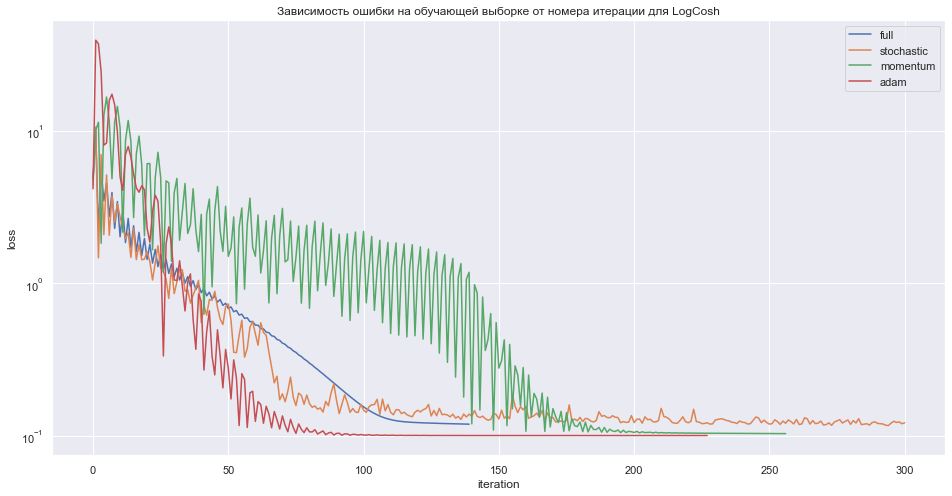

In [35]:
plt.figure(figsize=(16, 8))

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации для LogCosh')
plt.yscale('log') 

for method in methods:
    plt.plot(descents_info_log_cosh[method]['iterations'], label=method)
    
plt.legend()
plt.show()

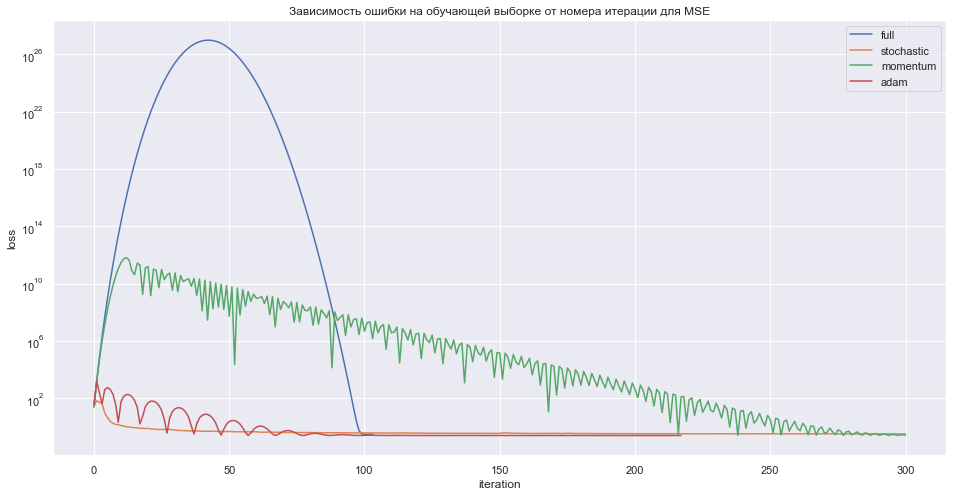

In [36]:
plt.figure(figsize=(16, 8))

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации для MSE')
plt.yscale('log') 

for method in methods:
    plt.plot(descents_info[method]['iterations'], label=method)
    
plt.legend()
plt.show()

Ключевым является избавление от резкого скачка full вверх, а также в целом все спуски сходятся быстрее (хорошо видно у momentum)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`
#### Я решил приготовить рулетики из баклажанов с чесночной начинкой и грецким орехом.

##### Рецепт:
* баклажаны, 2 шт
* творожный сыр, 200 г
* чеснок, 3 зубчика
* грецкие орехи, 30 г
* петрушка, 1 веточка

##### Способ приготовления:
1. Нарезать баклажаны тонкими пластинами, смазать соевым соусом и маслом
2. Приготовить баклажаны в духовке 30 минут при температуре 140° 
3. Вымочить в теплой воде, затем просушить бумажным полотенцем
3. Намешать начинку: творожный сыр с чесноком, петрушкой и грецким орехом
4. Выложить соус на баклажанную пластину и скатать рулетики
5. Если есть гранат, посыпать их гранатом (во всем Стамбуле не оказалось граната, эх)

##### Готовить баклажаны в Стамбуле очень весело, но скучаю по Москве :( 

<img src="eda1.jpg" width="400">
<img src="eda2.jpg" width="400">
<img src="eda3.jpg" width="400">
<img src="eda4.jpg" width="400">

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Начнем с MAE:
$$
L(y, a) = \frac{1}{l} \left| a - y \right|
$$
$$
L(y, X, w) =  \frac{1}{l} \left| Xw - y \right|
$$
Считаем градиент:
$$
\frac{\partial \frac{1}{l} \left| Xw - y \right|}{\partial w} = 
\frac{1}{l} \cdot \frac{\partial \left| Xw - y \right|}{\partial w} 
=
\frac{1}{l} \cdot sign \left( Xw - y\right) \cdot X
$$
А сумма тогда:
$$
X^T \cdot \frac{1}{l} \cdot sign \left( Xw - y\right) 
$$
Теперь Huber:
$$
L(y, a) = 
\begin{cases}
\frac{1}{2} (y - a)^2, \; |y - a| < \delta \\
\delta \left(|y - a| - \frac{1}{2} \delta \right), \; |y - a| >= \delta
\end{cases}
$$
Тогда считаем градиент:
$$
\frac{\partial \frac{1}{2} (y - Xw)^2 }{\partial w} = - (y - Xw) \cdot X
$$

$$
\frac{\partial \delta \left(|y - Xw| - \frac{1}{2} \delta \right)}{\partial w} = - \delta \cdot sign (y - Xw) \cdot X
$$


Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [37]:
# YOUR CODE:
from descents import LossFunction

# YOUR CODE:
methods = ['full', 'stochastic', 'momentum', 'adam']

descents_info_MAE = {
    'full': {},
    'stochastic': {},
    'momentum': {},
    'adam': {}
}

for method in methods:
    best_lambda = None
    best_loss = math.inf
    
    descent_name_ = method
    dimension_ = X_valid.shape[1]
    loss_function_ = LossFunction.MAE
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_
        }
    }
        
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        model = LinearRegression(descent_config = descent_config)
        model = model.fit(X_train, y_train)
    
        mae_valid = model.calc_loss(X_valid, y_valid)
        
        if mae_valid < best_loss:
            best_lambda = lambda_
            best_loss = mae_valid
            
    descents_info_MAE[method]['lambda'] = best_lambda
    descents_info_MAE[method]['loss'] = best_loss
descents_info_MAE

{'full': {'lambda': 2.782559402207126, 'loss': 0.39145812021556875},
 'stochastic': {'lambda': 2.782559402207126, 'loss': 0.3677203686895044},
 'momentum': {'lambda': 10.0, 'loss': 0.33598783201208987},
 'adam': {'lambda': 0.7742636826811278, 'loss': 0.3323799222622464}}

In [38]:
for method in methods:
    r2_train = math.inf
    r2_test = math.inf
    
    mae_train = math.inf
    mae_test = math.inf
    
    iterations_num = None
    
    descent_name_ = method
    dimension_ = X_train.shape[1]
    loss_function_ = LossFunction.MAE
    descent_config = {
        'descent_name': descent_name_,
        'regularized': False,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_,
            'lambda_' : descents_info_MAE[method]['lambda']
        }
    }
        
    model = LinearRegression(descent_config = descent_config)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mae_train = model.calc_loss(X_train, y_train)
    mae_test = model.calc_loss(X_test, y_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    iterations = model.loss_history
    iterations_num = len(model.loss_history)
    
    new_info = {
        'lambda': descents_info_MAE[method]['lambda'],
        'loss': descents_info_MAE[method]['loss'],
        'r2_train': r2_train,
        'r2_test': r2_test,
        'MAE_train': mae_train,
        'MAE_test': mae_test,
        'iterations': iterations,
        'iterations_num': iterations_num
    }
    descents_info_MAE[method] = new_info

In [39]:
descents_df_MAE = pd.DataFrame(data=descents_info_MAE)
descents_df_MAE = (descents_df_MAE.T).drop('iterations', axis=1)
descents_df_MAE

,lambda,loss,r2_train,r2_test,MAE_train,MAE_test,iterations_num
full,2.782559,0.391458,0.709255,0.707281,0.385637,0.385753,96
stochastic,2.782559,0.36772,0.719031,0.718382,0.374351,0.374173,301
momentum,10.0,0.335988,0.767172,0.766597,0.334372,0.33529,301
adam,0.774264,0.33238,0.766502,0.763894,0.326385,0.329224,301


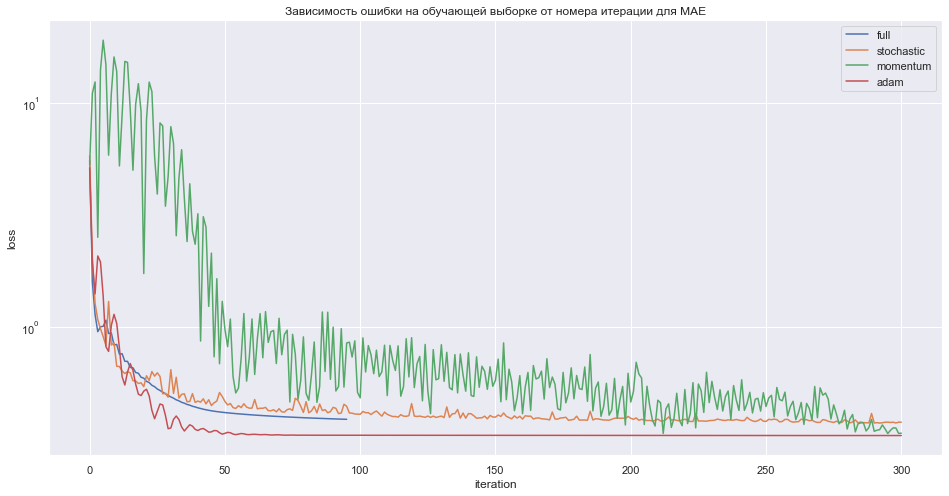

In [40]:
plt.figure(figsize=(16, 8))

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации для MAE')
plt.yscale('log') 

for method in methods:
    plt.plot(descents_info_MAE[method]['iterations'], label=method)
    
plt.legend()
plt.show()

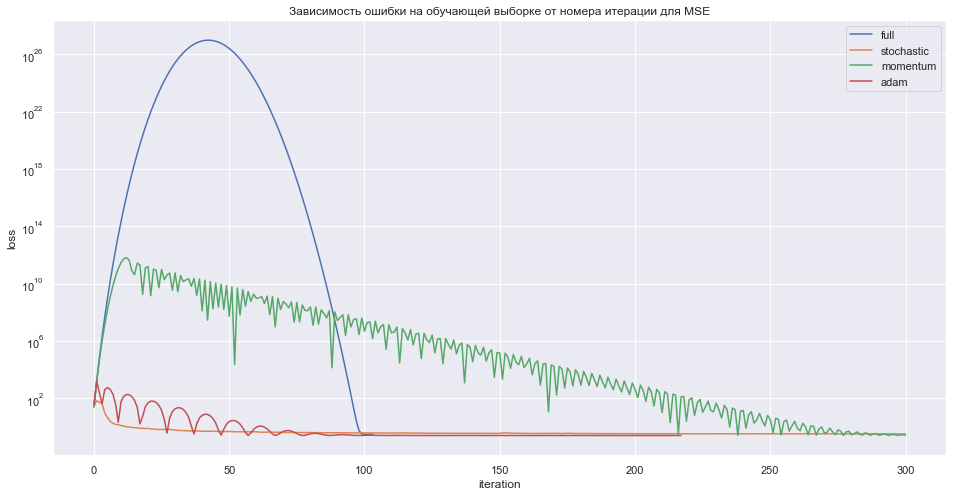

In [41]:
plt.figure(figsize=(16, 8))

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации для MSE')
plt.yscale('log') 

for method in methods:
    plt.plot(descents_info[method]['iterations'], label=method)
    
plt.legend()
plt.show()

Все спуски сильно быстрее сходятся к хорошим значениям ошибки, а также удалось избежать сильного выброса у full, при этом у всех спусков появились скачки значений, плавность ухудшилась 

In [ ]:
# YOUR CODE:
from descents import LossFunction

# YOUR CODE:
methods = ['full', 'stochastic', 'momentum', 'adam']

descents_info_huber = {
    'full': {},
    'stochastic': {},
    'momentum': {},
    'adam': {}
}


for method in methods:
    best_lambda = None
    best_loss = math.inf
    
    descent_name_ = method
    dimension_ = X_valid.shape[1]
    loss_function_ = LossFunction.Huber
    descent_config = {
        'descent_name': descent_name_,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_
        }
    }
        
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        model = LinearRegression(descent_config = descent_config)
        model = model.fit(X_train, y_train)
    
        huber_valid = model.calc_loss(X_valid, y_valid)
        
        if huber_valid < best_loss:
            best_lambda = lambda_
            best_loss = huber_valid
            
    descents_info_huber[method]['lambda'] = best_lambda
    descents_info_huber[method]['loss'] = best_loss
descents_info_huber

In [ ]:
for method in methods:
    r2_train = math.inf
    r2_test = math.inf
    
    huber_train = math.inf
    huber_test = math.inf
    
    iterations_num = None
    
    descent_name_ = method
    dimension_ = X_train.shape[1]
    loss_function_ = LossFunction.Huber
    descent_config = {
        'descent_name': descent_name_,
        'regularized': False,
        'kwargs': {
            'dimension': dimension_,
            'loss_function': loss_function_,
            'lambda_' : descents_info_huber[method]['lambda']
        }
    }
        
    model = LinearRegression(descent_config = descent_config)
    model = model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    huber_train = model.calc_loss(X_train, y_train)
    huber_test = model.calc_loss(X_test, y_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    iterations = model.loss_history
    iterations_num = len(model.loss_history)
    
    new_info = {
        'lambda': descents_info_huber[method]['lambda'],
        'loss': descents_info_huber[method]['loss'],
        'r2_train': r2_train,
        'r2_test': r2_test,
        'huber_train': huber_train,
        'huber_test': huber_test,
        'iterations': iterations,
        'iterations_num': iterations_num
    }
    descents_info_huber[method] = new_info

In [ ]:
descents_df_huber = pd.DataFrame(data=descents_info_huber)
descents_df_huber = (descents_df_huber.T).drop('iterations', axis=1)
descents_df_huber